<a href="https://colab.research.google.com/github/SofyaZeleneva/MMVSULAB1/blob/main/Zadanie2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

для матриц построить жордановы цепочки векторов:
1) А1 = (11 4; -4 3) и порождающий вектор b1= (1 1)
2) A2 = (5 -9 -4; 6 -11 -5; -7 13 6) и порождающий вектор b2= (1 1 1)
3) А3 = (3 1 0 0; 0 2 1 0; 0 0 2 1; -1 -1 -1 1) и порождающий вектор b3 = (1 1 1 1)

In [1]:
import numpy as np

def jordan_chain(A, b, max_iter=10, tol=1e-10):
    """
    Построение жордановой цепочки векторов для матрицы A и порождающего вектора b

    Параметры:
        A - матрица
        b - начальный вектор
        max_iter - максимальное количество итераций
        tol - допуск для проверки линейной зависимости

    Возвращает:
        Список векторов жордановой цепочки
    """
    chain = [b.flatten()]
    for _ in range(max_iter-1):
        next_vec = A @ chain[-1]
        if np.linalg.norm(next_vec) < tol:  # Проверка на нулевой вектор
            break
        # Проверка линейной зависимости с предыдущими векторами
        if len(chain) > 1:
            mat = np.column_stack(chain + [next_vec])
            if np.linalg.matrix_rank(mat) == np.linalg.matrix_rank(np.column_stack(chain)):
                break
        chain.append(next_vec.flatten())
    return chain

# 1. Первая матрица и вектор
A1 = np.array([[11, 4], [-4, 3]])
b1 = np.array([1, 1])
chain1 = jordan_chain(A1, b1)
print("Жорданова цепочка для A1:")
for i, vec in enumerate(chain1):
    print(f"v{i+1}: {vec}")

# 2. Вторая матрица и вектор
A2 = np.array([[5, -9, -4], [6, -11, -5], [-7, 13, 6]])
b2 = np.array([1, 1, 1])
chain2 = jordan_chain(A2, b2)
print("\nЖорданова цепочка для A2:")
for i, vec in enumerate(chain2):
    print(f"v{i+1}: {vec}")

# 3. Третья матрица и вектор
A3 = np.array([[3, 1, 0, 0], [0, 2, 1, 0], [0, 0, 2, 1], [-1, -1, -1, 1]])
b3 = np.array([1, 1, 1, 1])
chain3 = jordan_chain(A3, b3)
print("\nЖорданова цепочка для A3:")
for i, vec in enumerate(chain3):
    print(f"v{i+1}: {vec}")

Жорданова цепочка для A1:
v1: [1 1]
v2: [15 -1]

Жорданова цепочка для A2:
v1: [1 1 1]
v2: [ -8 -10  12]
v3: [ 2  2 -2]

Жорданова цепочка для A3:
v1: [1 1 1 1]
v2: [ 4  3  3 -2]
v3: [ 15   9   4 -12]
v4: [ 54  22  -4 -40]


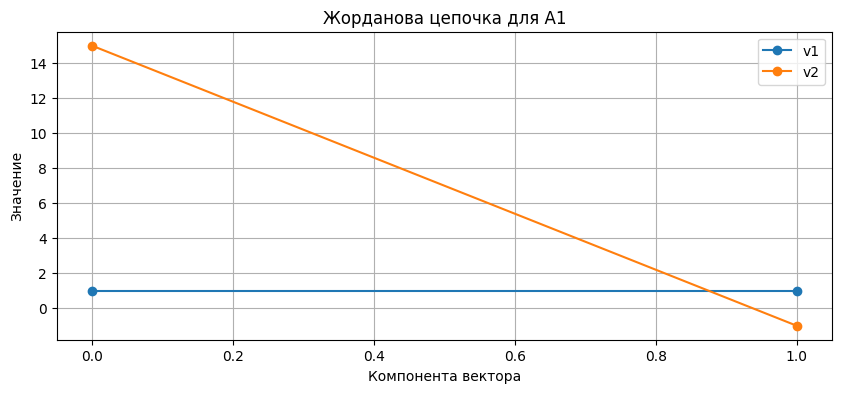

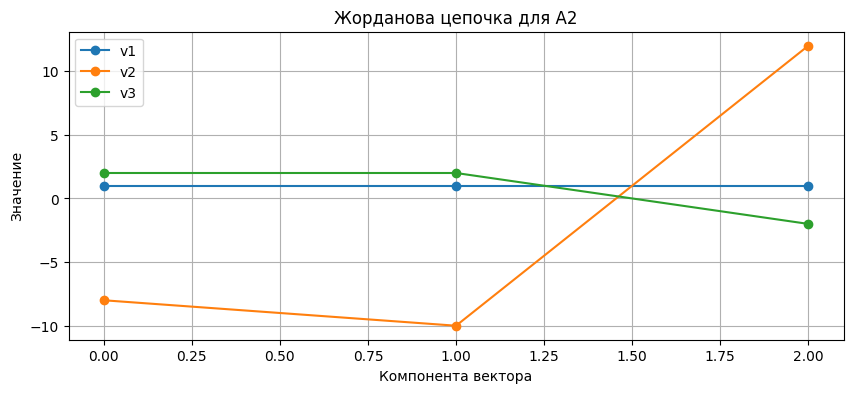

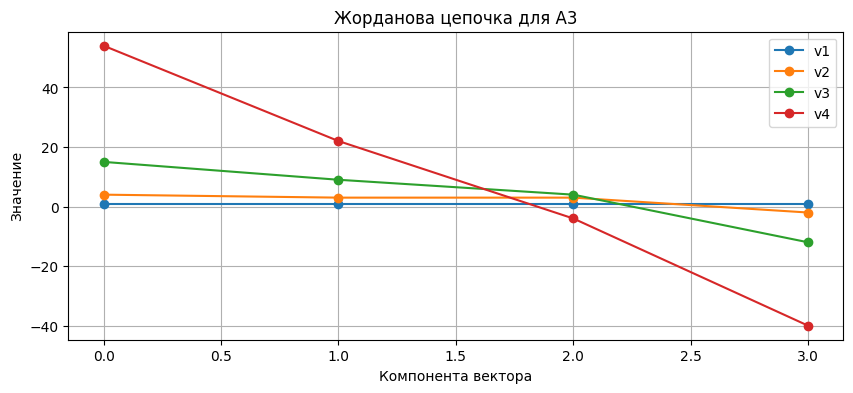

In [2]:
import matplotlib.pyplot as plt

def plot_chain(chain, title):
    """Визуализация жордановой цепочки"""
    plt.figure(figsize=(10, 4))
    for i, vec in enumerate(chain):
        plt.plot(vec, 'o-', label=f'v{i+1}')
    plt.title(title)
    plt.xlabel('Компонента вектора')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_chain(chain1, 'Жорданова цепочка для A1')
plot_chain(chain2, 'Жорданова цепочка для A2')
plot_chain(chain3, 'Жорданова цепочка для A3')